In [15]:
import numpy as np
import pandas as pd

In [3]:
names1880 = pd.read_csv("yob1880.txt", names=["name", "sex", "births"])

In [4]:
names1880.groupby("sex").births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [5]:
years = range(1880,2011)

In [7]:
pieces = []
columns = ["name", "sex", "births"]

for year in years:
    path = f'yob{year}.txt'
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
# concatenate everything
names = pd.concat(pieces, ignore_index=True)

In [9]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [10]:
total_births.tail()

sex,F,M
year,,
2006,1900375,2054352
2007,1921655,2074427
2008,1889800,2038995
2009,1835873,1982310
2010,1776223,1917416


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

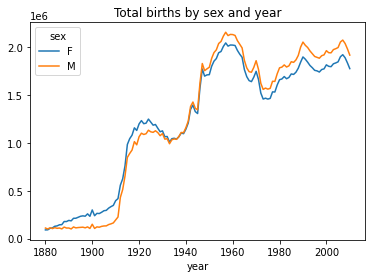

In [11]:
total_births.plot(title='Total births by sex and year')

In [12]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group

In [13]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [16]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [17]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [53]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [45]:
grouped = names.groupby(['year', 'sex'])

In [46]:
grouped.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1678130,Jacob,M,22139,2010,0.011546
1678131,Ethan,M,18008,2010,0.009392
1678132,Michael,M,17366,2010,0.009057
1678133,Jayden,M,17191,2010,0.008966


In [54]:
top1000 = grouped.apply(get_top1000)

In [55]:
top1000.columns

Index(['name', 'sex', 'births', 'year', 'prop'], dtype='object')

In [57]:
top1000.reset_index(drop=True, inplace=True)

In [58]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [28]:
boys = top1000[top1000.sex == 'M']

In [29]:
girls = top1000[top1000.sex == 'F']

In [59]:
total_births = top1000.pivot_table('births', index='year',
                                  columns='name', aggfunc=sum)

In [60]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

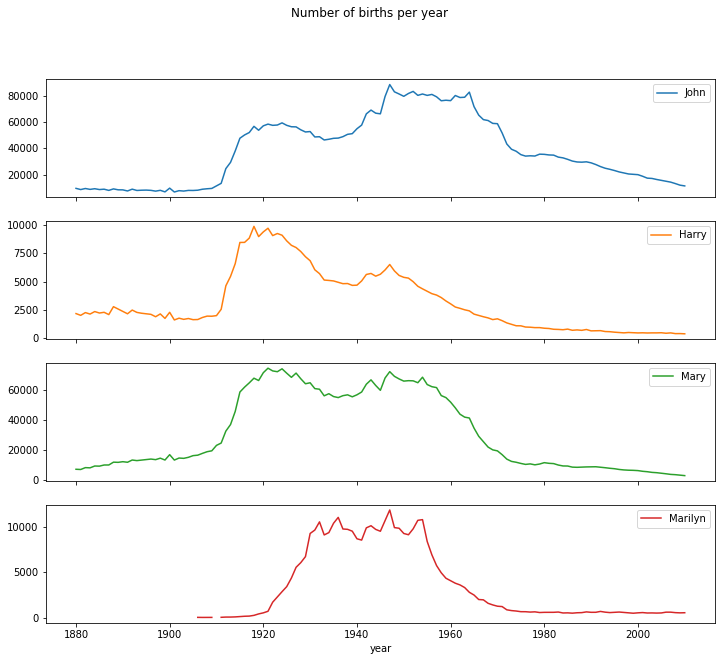

In [61]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

In [64]:
top1000[top1000.name == 'Monica']

,name,sex,births,year,prop
762,Monica,F,6,1880,0.000066
2488,Monica,F,10,1881,0.000109
6798,Monica,F,5,1883,0.000045
8671,Monica,F,8,1884,0.000062
10573,Monica,F,10,1885,0.000075
...,...,...,...,...,...
252124,Monica,F,1362,2006,0.000717
254160,Monica,F,1190,2007,0.000619
256192,Monica,F,1064,2008,0.000563
258214,Monica,F,972,2009,0.000529


In [66]:
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

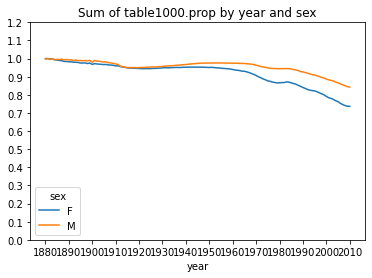

In [68]:
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [70]:
df = boys[boys.year == 2010]

In [76]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [77]:
prop_cumsum[:10]

year  sex         
2010  M    1678130    0.011546
           1678131    0.020938
           1678132    0.029995
           1678133    0.038961
           1678134    0.047858
           1678135    0.056599
           1678136    0.065185
           1678137    0.073453
           1678138    0.081559
           1678139    0.089644
Name: prop, dtype: float64

In [78]:
prop_cumsum.searchsorted(0.5)

116

In [79]:
df = boys[boys.year == 1900]

In [80]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [81]:
in1900.searchsorted(0.5)

24

In [82]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [83]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [84]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

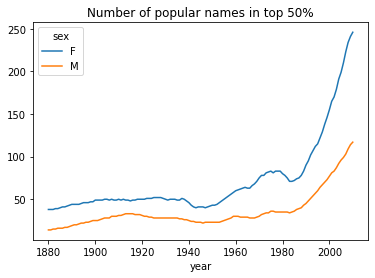

In [85]:
diversity.plot(title="Number of popular names in top 50%")

In [86]:
get_last_letter = lambda x:x[-1]

In [89]:
last_letters = names.name.map(get_last_letter)

In [90]:
last_letters.name = 'last_letter'

In [91]:
table = names.pivot_table('births', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum)

In [92]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [93]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691285.0  677176.0    977.0    5214.0   28888.0
b                 NaN     694.0     455.0    411.0    3910.0   39298.0
c                 5.0      49.0     957.0    482.0   15456.0   23360.0
d              6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e            133601.0  435009.0  316921.0  28665.0  178742.0  130325.0

In [94]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022001.0
     2010    1776223.0
M    1910     194209.0
     1960    2131990.0
     2010    1917416.0
dtype: float64

In [95]:
letter_prop = subtable / subtable.sum().astype(float)

In [96]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

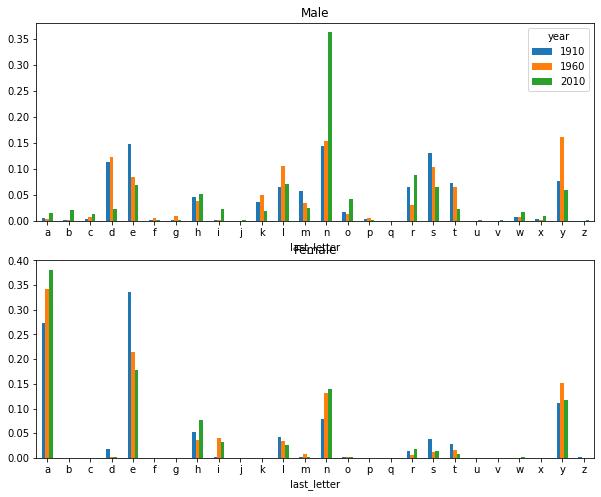

In [100]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

In [101]:
letter_prop = table / table.sum().astype(float)

In [103]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [104]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<AxesSubplot:xlabel='year'>

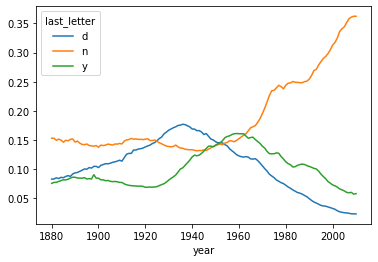

In [105]:
dny_ts.plot()